#### Данный ноутбук является частью материалов курса ML Школы Анализа Данных Яндекса

## Pylab magic

matplotlib inline - позволяет рисовать графики прямо в ноутбуке

pylab inline - дополнительно импортит разные библиотеки. Это сбивает с толку, делает код невоспроизводимым и может затереть ваши функции.

In [87]:
import sys
def imports(locals):
    return sorted([key for key in locals.keys()
                   if isinstance(locals[key], type(sys)) and not key.startswith('__')])

In [88]:
imports(locals())

['_sh',
 'add_newdocs',
 'cbook',
 'char',
 'cm',
 'ctypeslib',
 'datasets',
 'datetime',
 'docstring',
 'emath',
 'fft',
 'fftpack',
 'fftpack_lite',
 'helper',
 'lapack_lite',
 'linalg',
 'ma',
 'math',
 'matplotlib',
 'mlab',
 'mpl',
 'np',
 'numpy',
 'pd',
 'plt',
 'pylab',
 'pyplot',
 'random',
 'rec',
 'six',
 'sns',
 'style',
 'sys',
 'types',
 'warnings']

In [89]:
%matplotlib inline

In [90]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [91]:
imports(locals())

['_sh',
 'add_newdocs',
 'cbook',
 'char',
 'cm',
 'ctypeslib',
 'datasets',
 'datetime',
 'docstring',
 'emath',
 'fft',
 'fftpack',
 'fftpack_lite',
 'helper',
 'lapack_lite',
 'linalg',
 'ma',
 'math',
 'matplotlib',
 'mlab',
 'mpl',
 'np',
 'numpy',
 'pd',
 'plt',
 'pylab',
 'pyplot',
 'random',
 'rec',
 'six',
 'sns',
 'style',
 'sys',
 'types',
 'warnings']

In [92]:
data = [1,2]
print type(array(data))
print type(np.array(data))
print type(numpy.array(data))

<type 'numpy.ndarray'>
<type 'numpy.ndarray'>
<type 'numpy.ndarray'>


In [93]:
from IPython.core.display import Image
import pandas as pd
from sklearn import datasets
from scipy.stats import gaussian_kde

import warnings
warnings.filterwarnings('ignore')
from matplotlib import cm

import seaborn as sns

In [94]:
imshow

<function matplotlib.pyplot.imshow>

## Квартет Энскомба

Подробнее, см. [на Википедии](http://en.wikipedia.org/wiki/Anscombe's_quartet).

Наборы данных имеют одинаковое среднее, дисперсию, коэффициент корреляции между признаками. При визуализации на плоскости оказывается, что они имеют принципиально разный характер.

In [95]:
df = sns.load_dataset("anscombe")

In [96]:
datasets = ['I', 'II', 'III', 'IV']
data = []
for dataset in datasets:
    data.append(df[df['dataset'] == dataset][['x','y']].values)
    print data[-1]
    print '------'

[[ 10.     8.04]
 [  8.     6.95]
 [ 13.     7.58]
 [  9.     8.81]
 [ 11.     8.33]
 [ 14.     9.96]
 [  6.     7.24]
 [  4.     4.26]
 [ 12.    10.84]
 [  7.     4.82]
 [  5.     5.68]]
------
[[ 10.     9.14]
 [  8.     8.14]
 [ 13.     8.74]
 [  9.     8.77]
 [ 11.     9.26]
 [ 14.     8.1 ]
 [  6.     6.13]
 [  4.     3.1 ]
 [ 12.     9.13]
 [  7.     7.26]
 [  5.     4.74]]
------
[[ 10.     7.46]
 [  8.     6.77]
 [ 13.    12.74]
 [  9.     7.11]
 [ 11.     7.81]
 [ 14.     8.84]
 [  6.     6.08]
 [  4.     5.39]
 [ 12.     8.15]
 [  7.     6.42]
 [  5.     5.73]]
------
[[  8.     6.58]
 [  8.     5.76]
 [  8.     7.71]
 [  8.     8.84]
 [  8.     8.47]
 [  8.     7.04]
 [  8.     5.25]
 [ 19.    12.5 ]
 [  8.     5.56]
 [  8.     7.91]
 [  8.     6.89]]
------


In [97]:
%precision 2
for i in range(4):
    print "MEAN: ", 
    print data[i].mean(axis=0), "STD: ", 
    print data[i].std(axis=0), "CORR: ",
    print np.corrcoef(data[i].T)[0,1]

MEAN:  [ 9.   7.5] STD:  [ 3.16  1.94] CORR:  0.816420516345
MEAN:  [ 9.   7.5] STD:  [ 3.16  1.94] CORR:  0.816236506
MEAN:  [ 9.   7.5] STD:  [ 3.16  1.94] CORR:  0.81628673949
MEAN:  [ 9.   7.5] STD:  [ 3.16  1.94] CORR:  0.816521436889


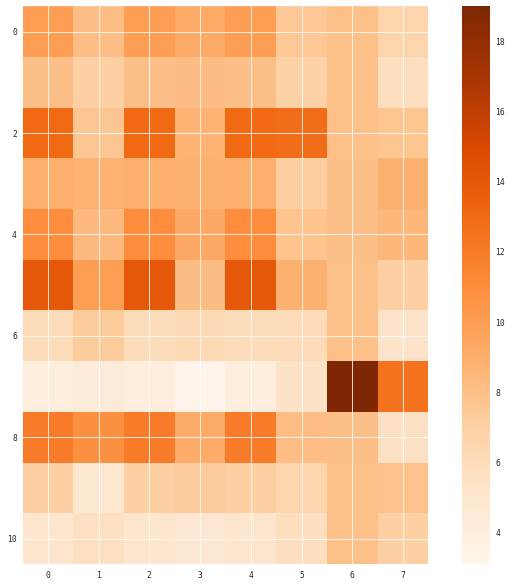

In [98]:
figure(figsize=(12,10))
imshow(np.hstack(data), interpolation='none', cmap=cm.Oranges)
colorbar()

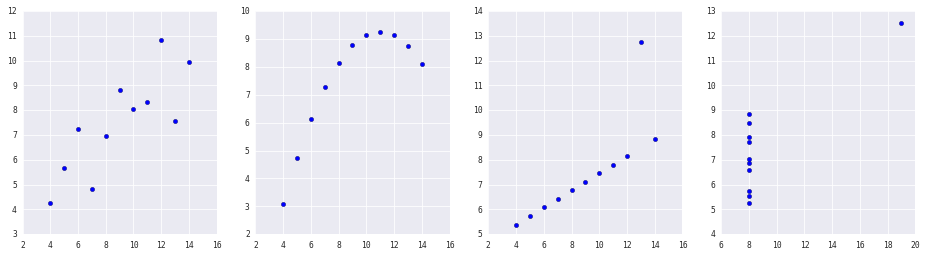

In [99]:
figure(figsize=(16, 4))
for idx, X in enumerate(data):
    subplot(1, 4, idx + 1)
    scatter(X[:, 0], X[:, 1])

[Seaborn](http://stanford.edu/~mwaskom/software/seaborn/) - библиотека для визуализации данных, основанная на matplotlib

легко ставится через pip install seaborn


## Использование линейной модели

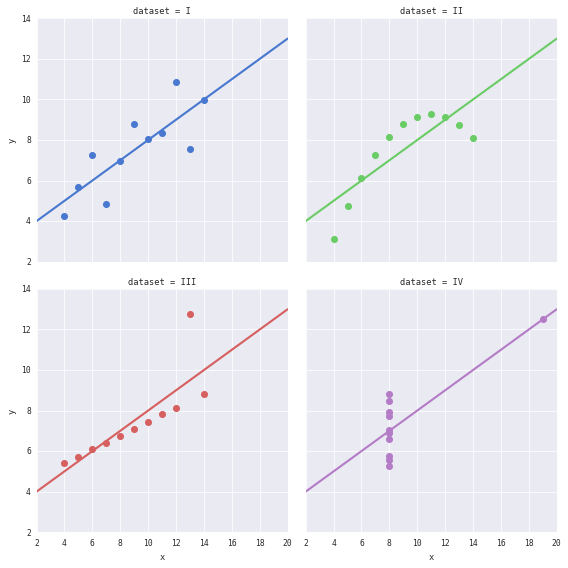

In [100]:
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df,
           col_wrap=2, ci=None, palette="muted", size=4,
           scatter_kws={"s": 50, "alpha": 1})

### Корреляционная матрица


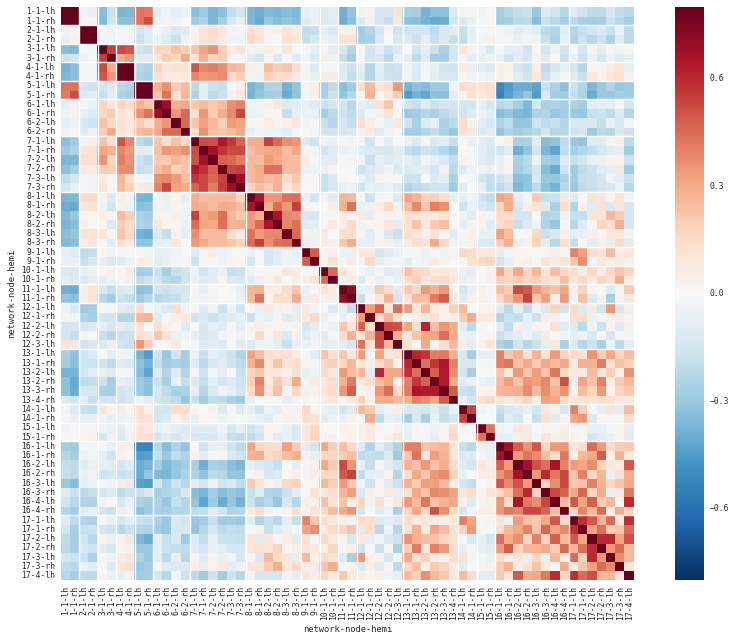

In [101]:
sns.set(context="paper", font="monospace")

df = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0)
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))

sns.heatmap(corrmat, vmax=.8, square=True)

# Use matplotlib directly to emphasize known networks
networks = corrmat.columns.get_level_values("network")
for i, network in enumerate(networks):
    if i and network != networks[i - 1]:
        ax.axhline(len(networks) - i, c="w")
        ax.axvline(i, c="w")
f.tight_layout()

Иногда полезно проводить линии через данные, чтобы лучше понимать зависимости

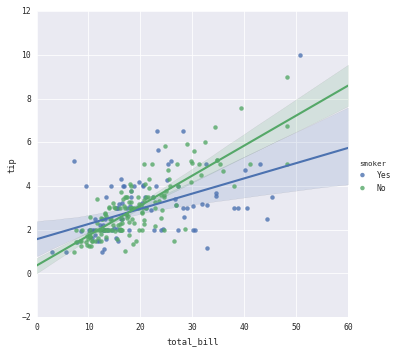

In [102]:
tips = sns.load_dataset("tips")

ax = sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips, size=5);


## Наборы данных

[Стандартные наборы данных и генераторы в SciKit-Learn](http://scikit-learn.org/stable/datasets/)

In [103]:
from sklearn import datasets
diabetes = datasets.load_diabetes()
X = diabetes.data

In [104]:
# sample 1-d data
points1 = random.choice(X[:, 5], 100)

In [105]:
# sample 2-d data
points2x, points2y = X[:,5], X[:,6]

##  Одномерные признаки 

### Набор точек на прямой

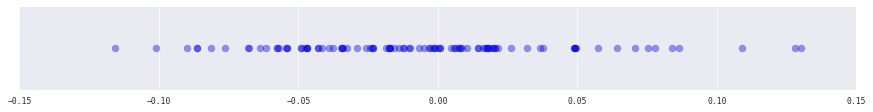

In [106]:
figure(figsize=(15, 1.5)), grid(True, axis='x'), yticks([])
scatter(points1, zeros(len(points1)), s=50, alpha=0.4)

### Jitter: случайно выбираем вертикальную координату, чтобы лучше видеть количество точек

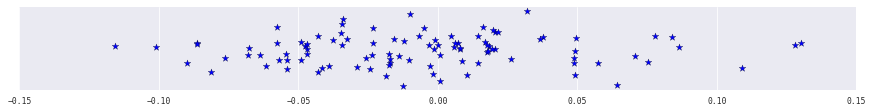

In [107]:
figure(figsize=(15, 1.5)), grid(True, axis='x'), yticks([])
scatter(points1, randn(len(points1)), s=50, marker='*')

Примеры: [Matplotlib Histogram Demo Extended](http://matplotlib.org/examples/pylab_examples/histogram_demo_extended.html), [Basic Data Plotting with Matplotlib Part 3: Histograms](http://bespokeblog.wordpress.com/2011/07/11/basic-data-plotting-with-matplotlib-part-3-histograms/)

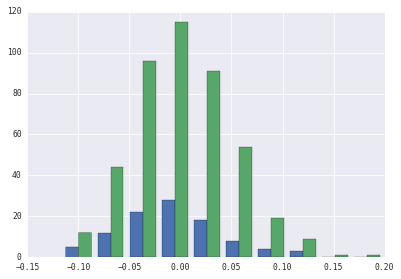

In [108]:
_ = plt.hist([points1, points2x])

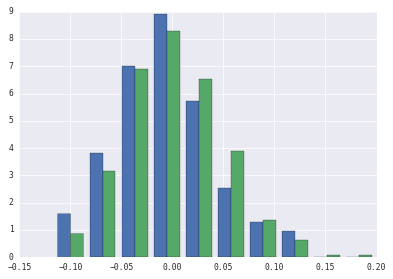

In [109]:
_ = plt.hist([points1, points2x], normed=True)

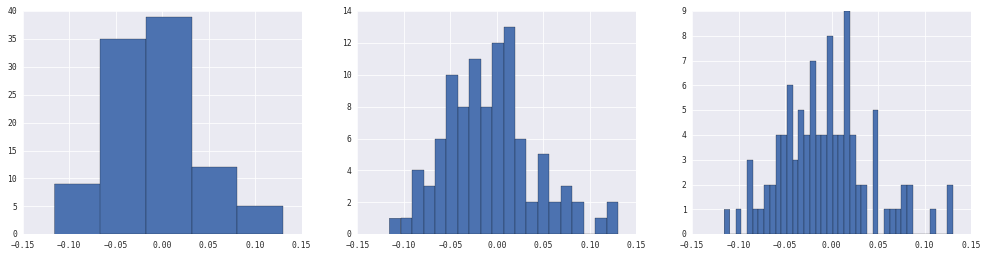

In [110]:
figure(figsize=(17, 4))
subplot(1, 3, 1) 
_ = hist(points1, bins=5)
subplot(1, 3, 2)
_ = hist(points1, bins=20)
subplot(1, 3, 3)
_ = hist(points1, bins=40)

###  Логарифмическая шкала

Если данные распределены слишком неравномерно, то можно изображать из на логарифмической шкале

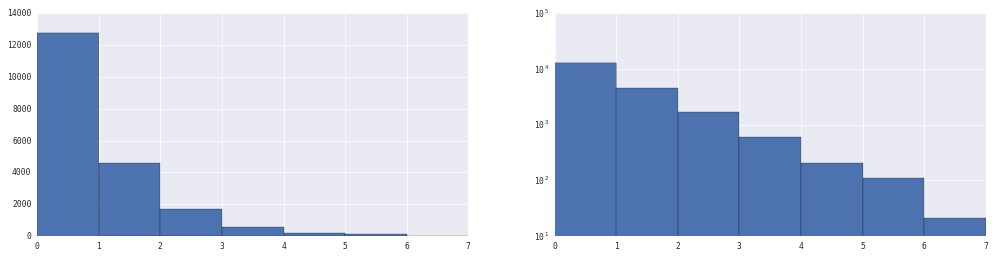

In [111]:
arr = np.random.exponential(1, 20000)

figure(figsize=(17, 4))
subplot(1, 2, 1)
plt.hist(arr, bins=range(0, 8, 1))
ax = subplot(1, 2, 2)
plt.hist(arr, bins=range(0, 8, 1))
ax.set_yscale('log')

show()

### 2D-гистограмма

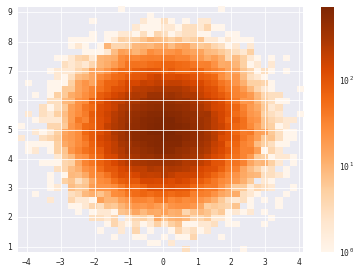

In [112]:
from matplotlib.colors import LogNorm
x = np.random.randn(100000)
y = np.random.randn(100000) + 5

plt.hist2d(x, y, bins=40, norm=LogNorm(), cmap=cm.Oranges)
plt.colorbar()
plt.show()

### KDE: Kernel Density Estimation

Пример: [Simple 1D Kernel Density Estimation](http://scikit-learn.org/stable/auto_examples/neighbors/plot_kde_1d.html)

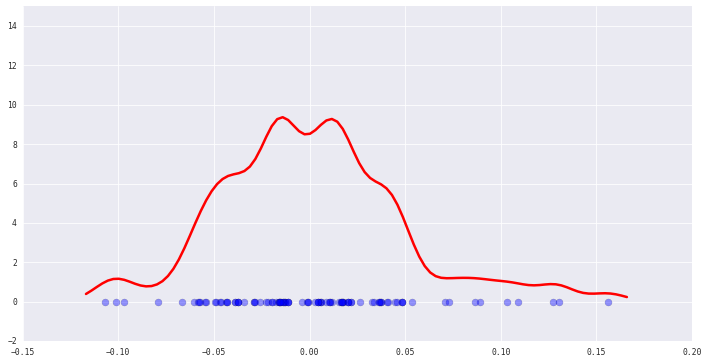

In [113]:
from scipy.stats import gaussian_kde
from ipywidgets import interact

diabetes = datasets.load_diabetes()
X = diabetes.data
points1 = random.choice(X[:, 5], 100)

def plot_gaussian_kde(width):
    plt.figure(figsize=(12, 6))
    density = gaussian_kde(points1, bw_method=width)
    xs = linspace(min(points1)-0.01, max(points1)+0.01, 100)
    plt.plot(xs, density(xs), linewidth=2.5, color='red')
    scatter(points1, zeros(len(points1)), s=50, alpha=0.4)
    plt.ylim(-2, 15)
    plt.show()


plot_gaussian_kde(0.2)

In [114]:
interact(plot_gaussian_kde, width=(0.02, 1.0, 0.01))

<function __main__.plot_gaussian_kde>

(-0.20, 0.20)

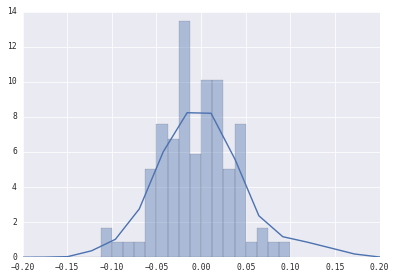

In [115]:
sns.distplot(points1, bins=np.linspace(-0.2, 0.1, 25));
plt.xlim((-0.2, 0.2))

### Последовательности

In [116]:
seq1 = [0.035753708, 0.025425873, -0.02886173, -0.062208079, 0.009859905, -0.029191028, 
        0.015445348, -0.041167612, 0.000661905, 0.022037345, -0.022692465, -0.013708704,
        0.000864697, -0.00381506, 0.00566126, 0.046831302, -0.006634978, 0.034566982, 
        -0.020528213, -0.008776701, -0.025919141, 0.015279487, 0.018577796, -0.014132879, 
        0.036607044, 0.011353209, -0.040542021, -0.022105644, -0.014888368, 0.007026745, 
        -0.011494996, -0.041136038, -0.002631499, 0.024654643, -0.03584061, 0.017303168, 
        0.001725406, 0.004975853, 0.000671759, -0.005891895, -0.013689039, 0.002192959, 
        0.007913215, -0.03852223, 0.007958798, -0.007133473, 0.011234009, -0.001410361]

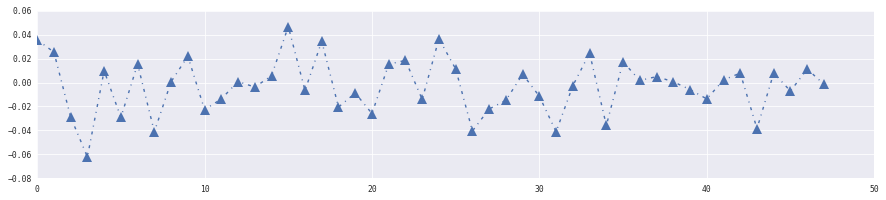

In [117]:
figure(figsize=(15, 3))
plot(seq1, '-.^', markersize=10)
grid(True)

<Container object of 3 artists>

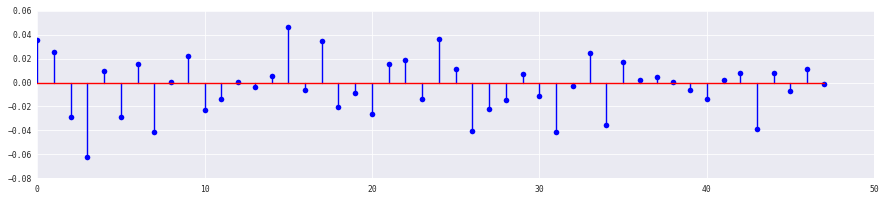

In [118]:
figure(figsize=(15, 3))

# Stem plot
stem(seq1)

<Container object of 48 artists>

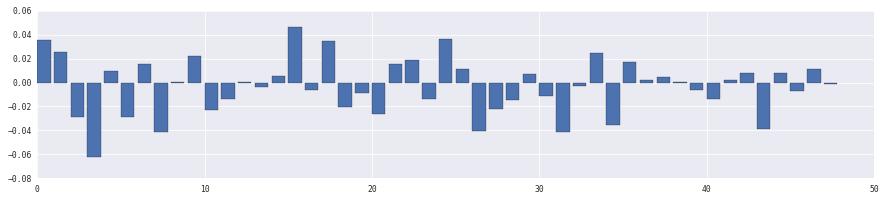

In [119]:
figure(figsize=(15, 3))
plt.bar(arange(len(seq1)), seq1)

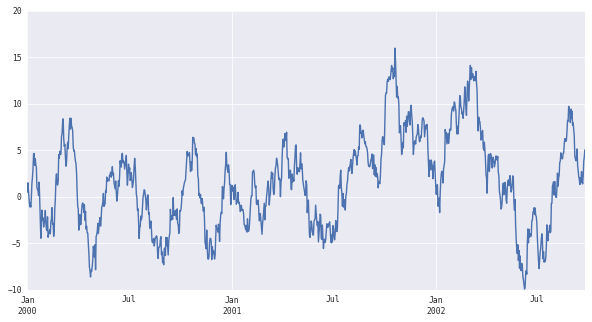

In [120]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot(figsize=(10,5))

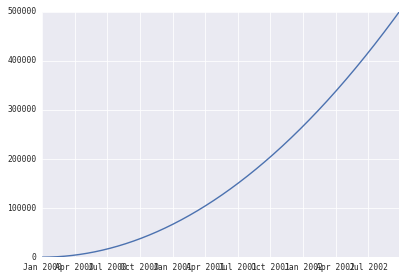

In [121]:
ts = pd.Series(np.arange(0, 1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()

plot(ts)

## Ящик с усами (диаграмма размаха)


[Подробнее](https://ru.wikipedia.org/wiki/%D0%AF%D1%89%D0%B8%D0%BA_%D1%81_%D1%83%D1%81%D0%B0%D0%BC%D0%B8)

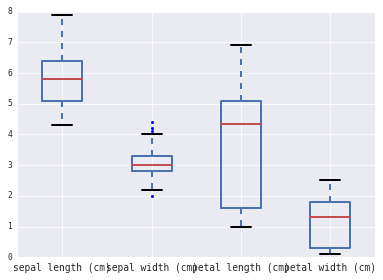

In [122]:
iris = datasets.load_iris()
data = pd.DataFrame(iris['data'], columns=iris['feature_names'])
target = iris['target']

ax = data.boxplot(figsize=(7,5), return_type='axes', sym='k.')
_ = plt.setp(ax.lines, linewidth=2.0)

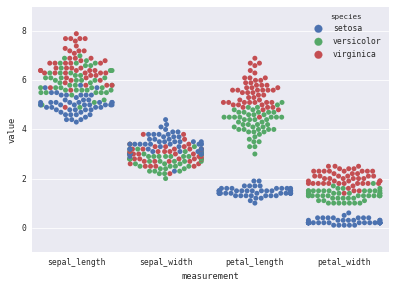

In [123]:
iris = sns.load_dataset("iris")
iris = pd.melt(iris, "species", var_name="measurement")

sns.swarmplot(x="measurement", y="value", hue="species", data=iris)

### Фильтрация выбросов

(-12.72, 15.98)

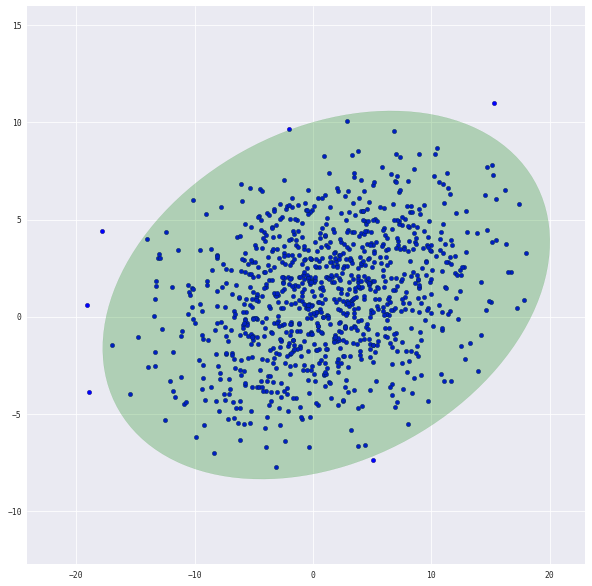

In [124]:
from matplotlib.patches import Ellipse

def plot_point_cov(points, nstd=2, ax=None, **kwargs):

    pos = points.mean(axis=0)
    cov = np.cov(points, rowvar=False)
    return plot_cov_ellipse(cov, pos, nstd, ax, **kwargs)

def plot_cov_ellipse(cov, pos, nstd=2, ax=None, **kwargs):

    def eigsorted(cov):
        vals, vecs = np.linalg.eigh(cov)
        order = vals.argsort()[::-1]
        return vals[order], vecs[:,order]

    if ax is None:
        ax = plt.gca()

    vals, vecs = eigsorted(cov)
    theta = np.degrees(np.arctan2(*vecs[:,0][::-1]))

    width, height = 2 * nstd * np.sqrt(vals)
    ellip = Ellipse(xy=pos, width=width, height=height, angle=theta, **kwargs)

    ax.add_artist(ellip)
    return ellip


points = np.random.multivariate_normal(
        mean=(1,1),                                       
        cov=[[40, 5],[5, 10]],                                       
        size=1000
)

x, y = points.T
figure(figsize=(10,10))
plt.scatter(x, y, s=20)


plot_point_cov(points, nstd=3, alpha=0.25, color='green')
plt.xlim((min(x) - 5, max(x) + 5))
plt.ylim((min(y) - 5, max(y) + 5))

### Циклические данные

Данные, имеющие циклическую природу (дни недели, месяца, часы в сутках), удобно изображать на круговых диаграммах

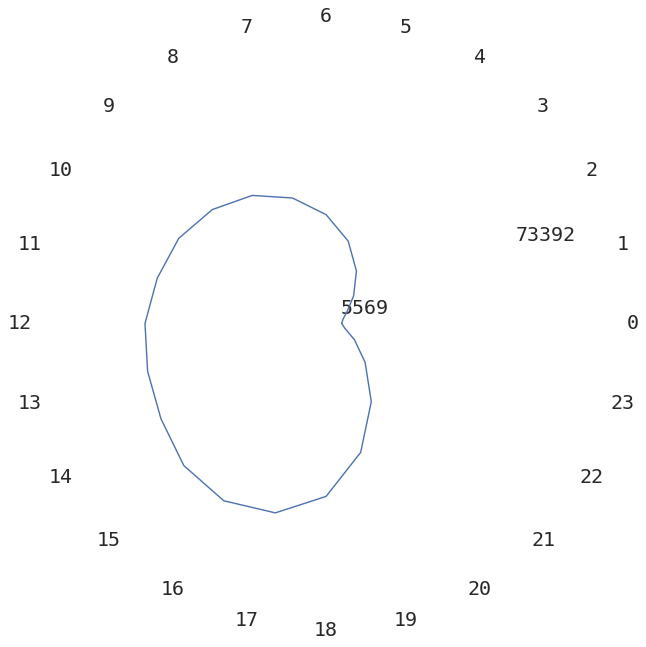

In [125]:
r = np.array([5569,6336,8765,13942,21739,30555,38981,46536,52970,57691,60975,62658,64911,66239,68352,72098,73392,70308,62004,47871,32396,19780,11740,7008,5569])
theta = [2 * np.pi * i / 24 for i in range(25)]

fig = plt.figure(figsize=(10,10), facecolor='white')
axes = plt.subplot(111, polar=True, axisbg='white')

axes.set_xticklabels(arange(24).astype(str))
axes.set_xticks(np.pi/180. * np.linspace(0,  360, 24, endpoint=False))
axes.set_yticks([min(r), max(r)])
axes.set_ylim((0,100000))
axes.tick_params(axis='both', which='major', labelsize=20)

axes.plot(theta, r)


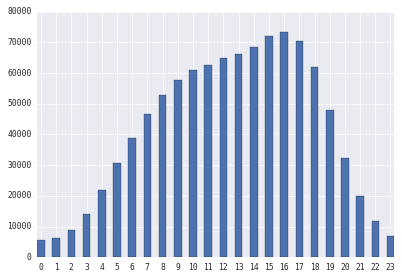

In [132]:
bar(arange(24)-0.25, r[:-1], 0.5, 0)
xlim((-0.25,23.25))
_ = plt.xticks(np.linspace(0, 23, 24))

## Scatter Matrix - скаттеры для каждой пары признаков

In [41]:
iris = datasets.load_iris()
diabetes = datasets.load_diabetes()

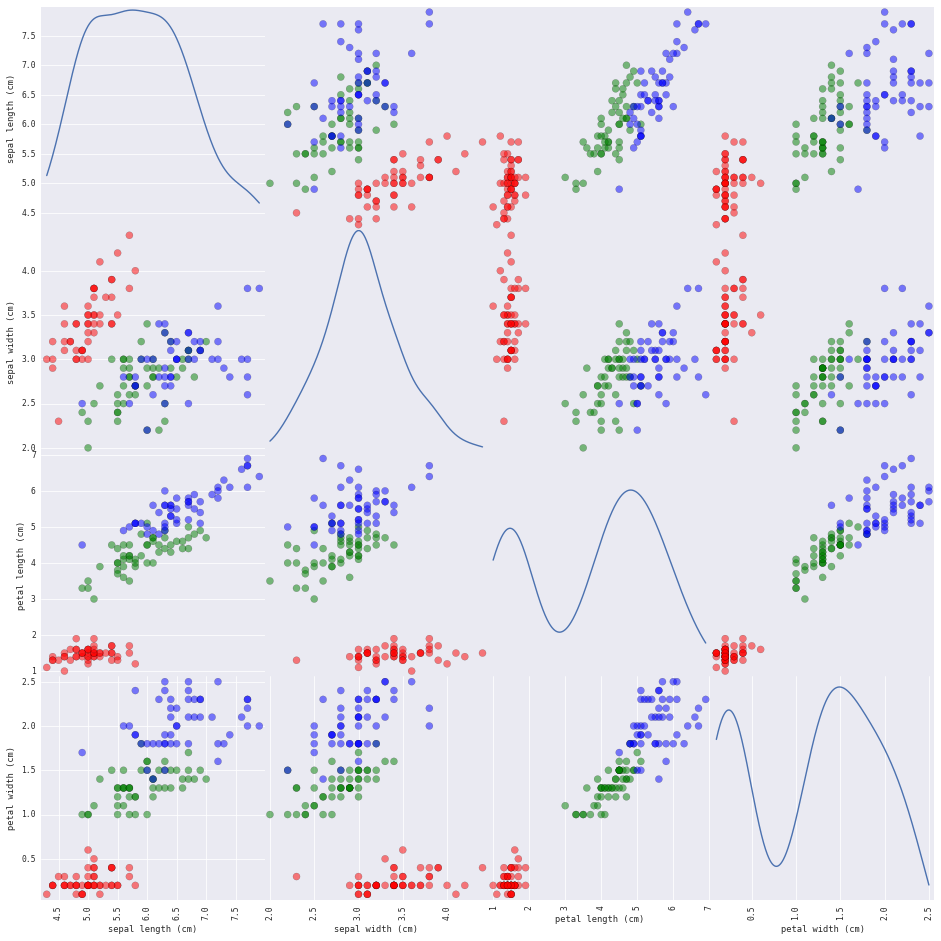

In [42]:
from pandas.tools.plotting import scatter_matrix
c = ["red", "green", "blue"]
colors = [c[i] for i in iris['target']]
iris = datasets.load_iris()
_ = scatter_matrix(pd.DataFrame(iris['data'],
                                columns=iris['feature_names']),
                   figsize=(16, 16), diagonal='kde', c=colors, s=200)

### Трехмерный scatter

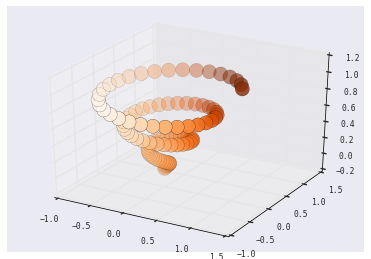

In [43]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = plt.axes(projection='3d')

z = np.linspace(0, 1, 100)
x = z * np.sin(20 * z)
y = z * np.cos(20 * z)

c = x + y

ax.scatter(x, y, z, c=c, s=200, cmap=cm.Oranges)



### Данные какой размерности можно представить одним двумерным скаттер-плотом?

* координата X
* координата Y
* цвет
* размер 
* форма
* прозрачность

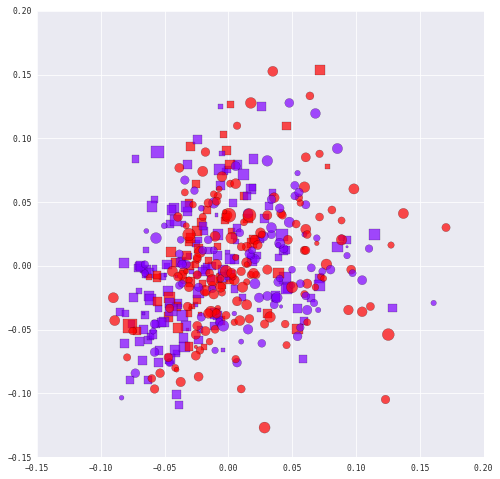

In [44]:
    figure(figsize=(8, 8))

    feature = diabetes.data[:, 5]
    s = 200*((feature - min(feature)) / (max(feature) - min(feature)))

    feature2 = (diabetes.data[:, 6] > 0)

    scatter(diabetes.data[feature2, 2], 
            diabetes.data[feature2, 4], 
            c=diabetes.data[feature2, 1], 
            s=s, 
            cmap='rainbow', 
            marker='s',
            alpha=0.7)
    scatter(diabetes.data[logical_not(feature2), 2], 
            diabetes.data[logical_not(feature2), 4], 
            c=diabetes.data[logical_not(feature2), 1], 
            s=s, 
            cmap='rainbow', 
            marker='o',
            alpha=0.7)

### Дискретные признаки и scatter

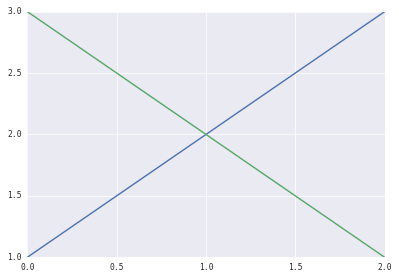

In [133]:
plot([1,2,3])
plot([3,2,1])

In [45]:
f = (diabetes.data[:,3] - min(diabetes.data[:,3]) )*4
feature = zeros(len(f))
feature[f > 0.2] = 1
feature[f > 0.4] = 2
feature[f > 0.6] = 3
feature[f > 0.8] = 4

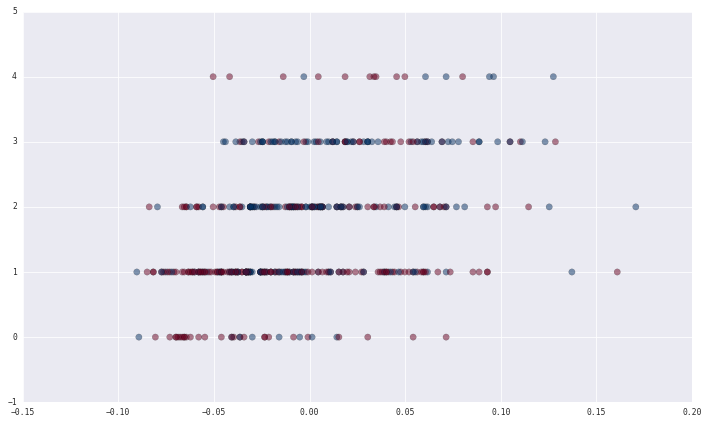

In [46]:
figure(figsize=(12, 7))
scatter(diabetes.data[:,2], feature, alpha=0.5, c=diabetes.data[:, 1], s=40, cmap=cm.RdBu)
grid(True)

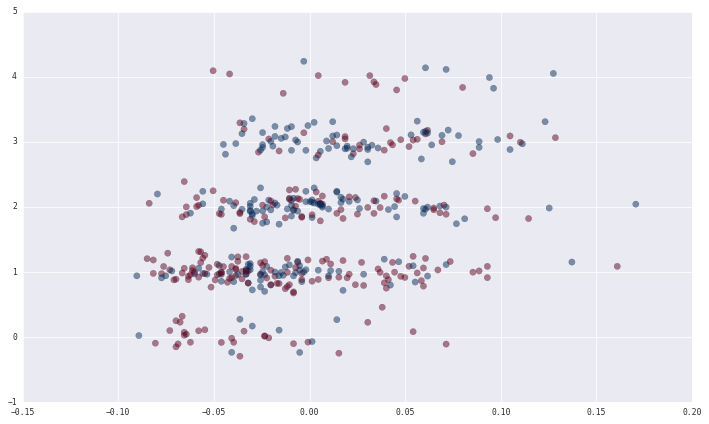

In [47]:
figure(figsize=(12, 7))
scatter(diabetes.data[:,2], feature + 0.15*randn(len(feature)), alpha=0.5, c=diabetes.data[:, 1], s=40, cmap=cm.RdBu)
grid(True)

## Сохранение картинок

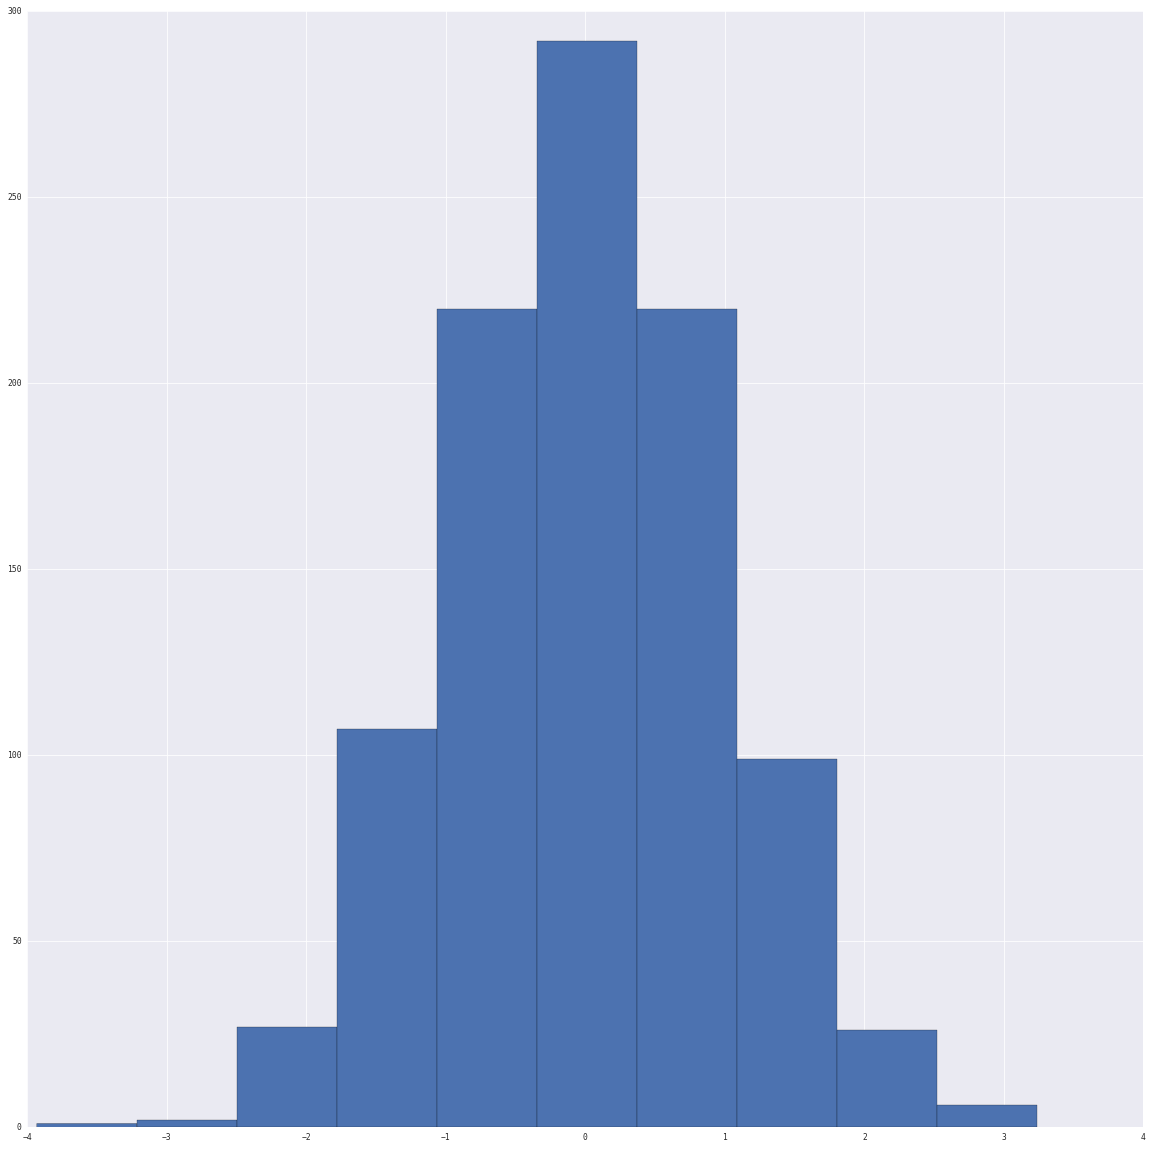

In [136]:
figure(figsize=(20,20))
plt.hist(np.random.randn(1000))


plt.savefig("my_hist.png", format='pdf')

In [49]:
!ls -l my_hist.png

-rw-r--r--+ 1 yellowduck  LD\Domain Users  5608 27 янв 18:36 my_hist.png


## Cross-validation

Изобразим качество нашей модели в зависимости от значений параметра

In [50]:
from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier


digits = load_digits()
X, y = digits.data, digits.target

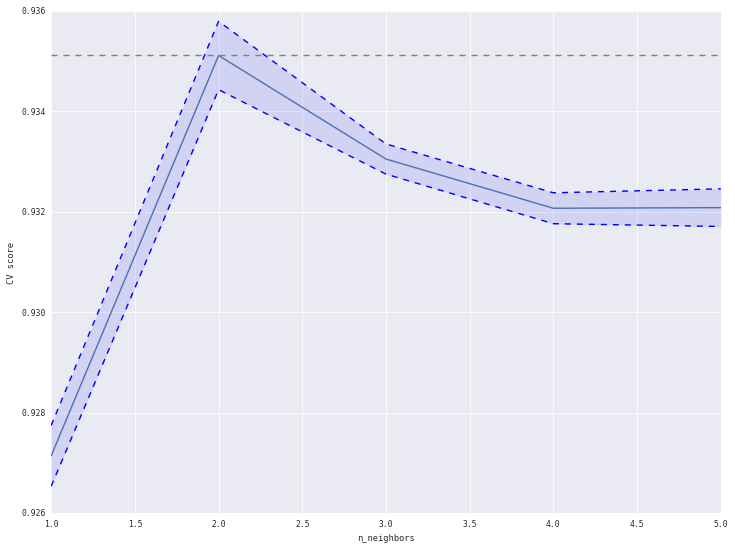

In [52]:
from sklearn import model_selection, datasets, linear_model

Xs = X[:1000]
ys = y[:1000]
knn = KNeighborsClassifier()
n_neighbors = np.arange(1,6)

scores = list()
scores_std = list()

for n in n_neighbors:
    knn.n_neighbors = n
    this_scores = model_selection.cross_val_score(knn, Xs, ys)

    scores.append(np.mean(this_scores))
    scores_std.append(np.std(this_scores))

params = np.linspace(1, 5, 5)
plt.figure(figsize=(12, 9))
plt.plot(params, scores)

upper = np.array(scores) + np.array(scores_std) / np.sqrt(len(Xs))
lower = np.array(scores) - np.array(scores_std) / np.sqrt(len(Xs))
                                                          
plt.plot(params, upper, 'b--')
plt.plot(params, lower, 'b--')
plt.fill_between(params, lower, upper, alpha=0.1, color="b")
plt.ylabel('CV score')
plt.xlabel('n_neighbors')
plt.axhline(np.max(scores), linestyle='--', color='.5')

plt.show()

##  Learning curve

Посмотрим как растет качество при увеличении размера обучающей выборки

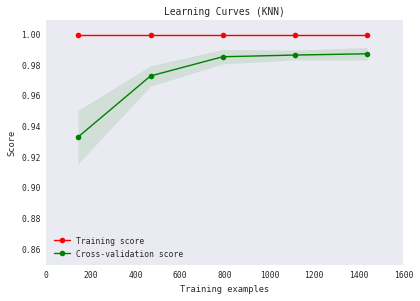

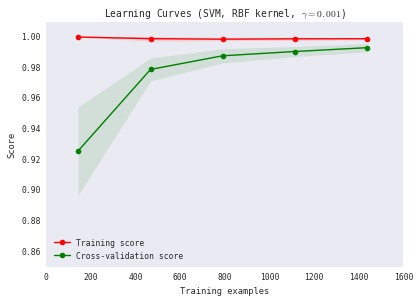

In [53]:
from sklearn import cross_validation
from sklearn.svm import SVC
from sklearn.learning_curve import learning_curve


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, train_sizes=train_sizes)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


title = "Learning Curves (KNN)"
cv = cross_validation.ShuffleSplit(digits.data.shape[0], n_iter=10,
                                   test_size=0.2, random_state=0)

estimator = KNeighborsClassifier(n_neighbors=1)
plot_learning_curve(estimator, title, X, y, ylim=(0.85, 1.01), cv=cv)

title = "Learning Curves (SVM, RBF kernel, $\gamma=0.001$)"
cv = cross_validation.ShuffleSplit(digits.data.shape[0], n_iter=10,
                                   test_size=0.2, random_state=0)
estimator = SVC(gamma=0.001)
plot_learning_curve(estimator, title, X, y, (0.85, 1.01), cv=cv)

plt.show()

## Сравнение алгоритмов

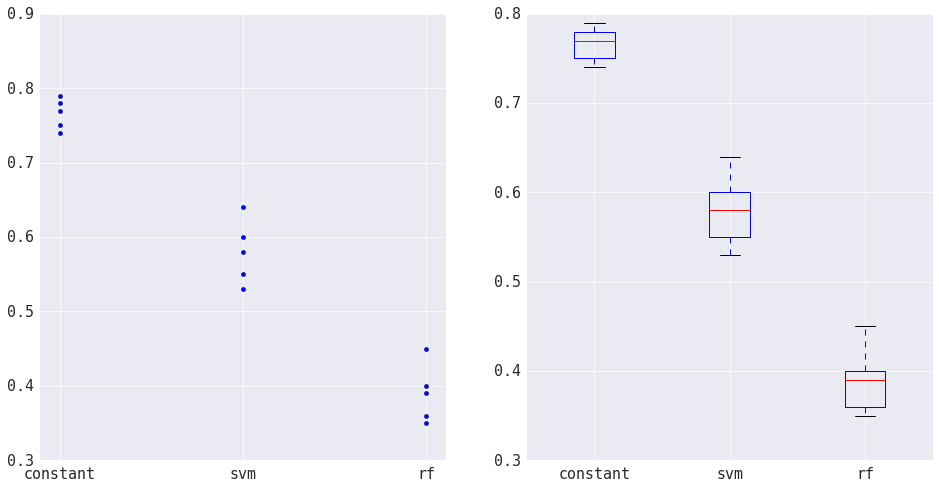

In [54]:
def show_scores(model_names, cv_scores):
    fig, axs = subplots(1, 2, figsize=(16, 8))
    for ax in axs:
        ax.set_xticks(arange(len(model_names)))
        ax.set_xticklabels(model_names)
        ax.grid(True)
        ax.tick_params(axis='both', which='major', labelsize=15)
    for i, (model_name, model_scores) in enumerate(zip(model_names, cv_scores)):
        axs[0].scatter(len(model_scores)*[i], model_scores)
    _ = axs[1].boxplot([model_scores for model_scores in cv_scores])
    axs[1].set_xticklabels(model_names)
    axs[1].tick_params(axis='both', which='major', labelsize=15)

    
model_names = ['constant', 'svm', 'rf']
cv_scores = [
    [0.75, 0.74, 0.78, 0.77, 0.79],
    [0.55, 0.58, 0.53, 0.60, 0.64],
    [0.35, 0.45, 0.4, 0.36, 0.39]
]

show_scores(model_names, cv_scores)

#                      Data visualization is critical for finding insights

 
  

# Задание

1) Постройте двумерный график вашей любимой функции (если такой нет, полюбите функцию из https://docs.scipy.org/doc/numpy/reference/routines.math.html). Отметьте на этом графике максимальное и минимальное значение

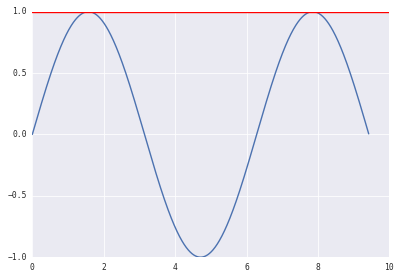

In [140]:
x = np.arange(0, np.pi * 3, 0.01)
y = np.sin(x)
# from matplotlib.pyplot import plot
_ = plot(x, y)
plt.axhline(np.max(y), linestyle='-', color='r')

2) Нормализуйте вектор y-координат. Для этого отнимите среднее и поделите на стандартное отклонение.

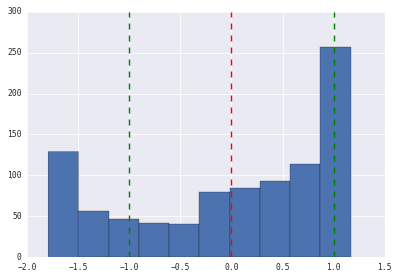

In [56]:
# figure(figsize=(20, 15))
y = np.sin(x) * 5
y -= y.mean()
y /= y.std()
_ = hist(y)
plt.axvline(np.mean(y), linestyle='--', color='r')
plt.axvline(np.mean(y) - np.std(y), linestyle='--', color='g')
plt.axvline(np.mean(y) + np.std(y), linestyle='--', color='g')

3) Николай Иванович играет в игру: он берет из мешка с числами от 1 до 1000 
    случайное число, записывает его на бумажке и возвращает число в мешок. Так он поступает 1000 раз.
    После этого Николай Иванович считает, сколько разных чисел у него на бумажке. Посчитайте и вы ;)
    
Постройте график, где по X будут числа в порядке убывания количества упоминаний на бумажке, а по Y - количество упоминаний. Возможно, уместно построить график в логарифмической по X шкале

627


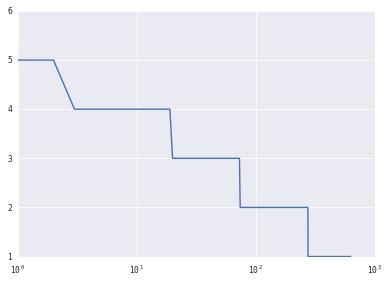

In [57]:
bag = np.arange(1, 1001)
paper = []
for _ in xrange(0, 1000):
    paper.append(np.random.choice(bag))
    
print len(set(paper))
from collections import defaultdict
uniq_numbers = defaultdict(int)
a = {}
for number in paper:
    uniq_numbers[number] += 1
uniq_numbers_counts = sorted(uniq_numbers.values(), reverse=True)
plot(xrange(len(uniq_numbers_counts)), uniq_numbers_counts)
xscale('log')

4) постройте трехмерный график вашей любимой функции от 2-х переменных

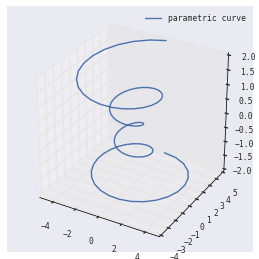

In [59]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=plt.figaspect(1)) 
ax = fig.gca(projection='3d')
theta = np.linspace(-4 * np.pi, 4 * np.pi, 100)
z = np.linspace(-2, 2, 100)
r = z**2 + 1
x = r * np.sin(theta)
y = r * np.cos(theta)
ax.plot(x, y, z, label='parametric curve')
ax.legend()